In [63]:
import pandas as pd
import numpy as np
from tqdm import tqdm
from matplotlib import pyplot as plt
tqdm.pandas()

In [21]:
zipdict = {'02128' : "EAST BOSTON", '02115' : "KENMORE", '02130' : "JAMAICA PLAIN", '02129' : "CHARLESTOWN" ,\
 '02114' :"DOWNTOWN",  '02113' : "NORTH END", '02109' : "NORTH END", '02108' : "BEACON HILL" , '02110' : "DOWNTOWN",\
 '02201' : "DOWNTOWN", '02210' : "SOUTH BOSTON" ,'02116' : "BACK BAY" , '02111' : "CHINATOWN", '02127' : "SOUTH BOSTON",\
 '02118' : "SOUTH END",'02215' : "KENMORE", '02120' : "JAMAICA PLAIN",\
 '02125' : "HARBOR ISLANDS", '02122' : "DORCHESTER", '02124' : "DORCHESTER", '02131' : "ROSINDALE", '02121' : "ROXBURY",\
 '02126' : "MATTAPAN", '02136' : "HYDE PARK", '02135' : "ALLSTON", '02132' : "WEST ROXBURY",
 '02467' : "CHESTNUT HILL", '02134' : "ALLSTON", '02167' : "CHESTNUT HILL"}

In [33]:
data = pd.read_csv("data.csv",dtype = {"zip" : str})
data["city"] = data.progress_apply((lambda x : zipdict[x["zip"]] if x["zip"]in zipdict else None),axis = 1)

100%|███████████████████████████████████████████████████████████████████████| 621182/621182 [00:10<00:00, 61100.65it/s]


In [36]:
data_multi = data[data["occupancytype"] == "Multi"]
data[data["description"] == "Change Occupancy"]["city"].value_counts()

SOUTH BOSTON      1131
BACK BAY           861
ALLSTON            781
DORCHESTER         706
SOUTH END          659
JAMAICA PLAIN      656
EAST BOSTON        622
KENMORE            591
DOWNTOWN           579
HARBOR ISLANDS     439
NORTH END          432
CHINATOWN          360
CHARLESTOWN        306
BEACON HILL        302
ROSINDALE          295
ROXBURY            277
HYDE PARK          258
MATTAPAN           172
WEST ROXBURY       167
CHESTNUT HILL       20
Name: city, dtype: int64

In [59]:
data["Year"] = data.apply((lambda x : int(x["issued_date"].split("-")[0])),axis=1)

In [165]:
data["description"].unique()

array(['Interior/Exterior Work', 'City of Boston', 'Other',
       'Renovations - Exterior', 'Renovations - Interior NSC',
       'Application to Correct a Violation', 'Addition',
       'Demolition - Exterior', 'Fire Alarm', 'Fire Protection/Sprinkler',
       'Signs', 'Cellular Tower', 'New construction', nan, 'Erect',
       'Fire Protection Sprinkler >9', 'Excavation  Borings Test Pits',
       'Roofing', 'Fast Track Application', 'Plumbing',
       'Change Occupancy', 'Solar Panels', 'Special Events',
       'Demolition - Interior', 'General', 'Canopy', 'Awning', 'Temp COO',
       'Fencing Renovation >6ft', 'Insulation', 'Generators', 'Garage',
       'Subdivision  Combining Lot', 'Low Voltage', 'Siding',
       'Temporary Signs/Banners', 'Residential Parking', 'Electrical',
       'Driveway Installation', 'No Record of Occupancy',
       'Annual Maintenance', 'Temporary Trailers', 'Industrial Boiler',
       'Summer Program Fast Track', 'Renewal of Signs Permit',
       'Commerc

In [149]:
data["city"].unique()

array(['Boston', 'West Roxbury', 'Charlestown', 'Roxbury', 'Brighton',
       'Allston', 'Jamaica Plain', 'East Boston', 'Dorchester',
       'Hyde Park', 'South Boston', 'Roslindale', 'Mission Hill',
       'Mattapan', 'BOSTON', 'Jamaica Plain/', 'Chestnut Hill',
       'NorthEnd/', 'DORCHESTER', 'South Boston/', 'Mission Hill/',
       'Boston/West End', 'West End', 'NorthEnd', 'Dorchester/', 'Fenway',
       'Boston/Roxbury', 'South End', 'Roxbury/', 'BOSTON/',
       'Charlestown/', 'Back Bay/Boston', nan, 'Boston/Downtown',
       "Boston's Historic North End", 'Dorchester Center/',
       'Financial District', 'Dorchester Center',
       'Downtown/Financial District', 'Dorchester (Lower Mills)/',
       'BRIGHTON', 'ALLSTON', 'Dorchester//', 'Fenway/',
       'Boston/Beacon Hill', 'BOSTON/CHINATOWN', 'Boston/Chinatown',
       'Chinatown', 'ROXBURY', 'Hyde Park/', 'South End/', 'BRIGHTON/',
       'BOSTON/Waterfront', 'HYDE PARK', 'Boston/Back Bay', 'MATTAPAN',
       'Boston/Fen

In [17]:
data.groupby("description")["Year"].value_counts()

description         Year
Addition            2019    322
                    2021    256
                    2016    236
                    2022    236
                    2018    223
                           ... 
Temporary Trailers  2021      2
                    2022      1
Tent                2012     47
Trench              2010      4
                    2011      3
Name: Year, Length: 789, dtype: int64

In [30]:
data = data.dropna(axis=0,subset=["zip"])
data["zip"].unique()

array(['02109', '02132', '02129', '02118', '02135', '02134', '02114',
       '02119', '02130', '02128', '02124', '02108', '02136', '02121',
       '02127', '02210', '02111', '02199', '02125', '02122', '02215',
       '02116', '02110', '02113', '02115', '02120', '02126', '02131',
       '02467', '02163', '01803', '02201', '02117', '02151', '02137',
       '02203', '02103', '02133', '02126-1616', '08091', '02222', '02446',
       '02123', '02468', '02158', '8', '02104'], dtype=object)

In [150]:
zipdict = {'02128' : "EAST BOSTON", '02115' : "KENMORE", '02130' : "JAMAICA PLAIN", '02129' : "CHARLESTOWN" ,\
 '02114' :"DOWNTOWN",  '02113' : "NORTH END", '02109' : "NORTH END", '02108' : "BEACON HILL" , '02110' : "DOWNTOWN",\
 '02201' : "DOWNTOWN", '02210' : "SOUTH BOSTON" ,'02116' : "BACK BAY" , '02111' : "CHINATOWN", '02127' : "SOUTH BOSTON",\
 '02118' : "SOUTH END",'02215' : "KENMORE", '02120' : "JAMAICA PLAIN",\
 '02125' : "HARBOR ISLANDS", '02122' : "DORCHESTER", '02124' : "DORCHESTER", '02131' : "ROSINDALE", '02121' : "ROXBURY",\
 '02126' : "MATTAPAN", '02136' : "HYDE PARK", '02135' : "ALLSTON", '02132' : "WEST ROXBURY",
 '02467' : "CHESTNUT HILL", '02134' : "ALLSTON", '02167' : "CHESTNUT HILL"}

In [38]:
assessments = pd.read_csv("property_assessments.csv",dtype = {"ZIPCODE" : str})

C:\Users\laser\AppData\Local\Temp\ipykernel_40924\3884422691.py:1: DtypeWarning: Columns (0,1,2,3,5,6,12,13,16,18,19,20,26,29,30,32,33,37,39,41,42) have mixed types. Specify dtype option on import or set low_memory=False.
  assessments = pd.read_csv("property_assessments.csv",dtype = {"ZIPCODE" : str})


In [43]:
assessments["city"] = assessments.progress_apply((lambda x : zipdict[x["ZIPCODE"]] if x["ZIPCODE"]in zipdict else None),axis = 1)

100%|█████████████████████████████████████████████████████████████████████| 2776868/2776868 [01:03<00:00, 43731.19it/s]


In [47]:
assessments["city"]

0          EAST BOSTON
1          EAST BOSTON
2          EAST BOSTON
3          EAST BOSTON
4          EAST BOSTON
              ...     
2776863        ALLSTON
2776864        ALLSTON
2776865        ALLSTON
2776866        ALLSTON
2776867       MATTAPAN
Name: city, Length: 2776868, dtype: object

In [101]:
assessments[assessments["RES_UNITS"] > 0 ]["LU"].unique()

array(['CM', 'CD', 'E', 'EA', 'R4', 'CC', 'CP', 'RC', 'A', 'C', 'R1',
       'R3', 'R2', 'RL'], dtype=object)

In [129]:
a_city = assessments.groupby(["city","Year"])
a_city_lu = a_city["LU"].value_counts()
counts = assessments.groupby(["city"])["Year"].value_counts()


In [133]:
multi_data

,city,year,R1,R2,R3,R4,A,RM,RM/R1,RM-R1
0,EAST BOSTON,2008.0,975.0,1250.0,2183.0,222.0,70.0,3725.0,3.820513,2750.0
1,EAST BOSTON,2009.0,980.0,1239.0,2162.0,216.0,65.0,3682.0,3.757143,2702.0
2,EAST BOSTON,2010.0,976.0,1231.0,2160.0,218.0,67.0,3676.0,3.766393,2700.0
3,EAST BOSTON,2011.0,978.0,1219.0,2170.0,213.0,66.0,3668.0,3.750511,2690.0
4,EAST BOSTON,2012.0,977.0,1220.0,2183.0,222.0,75.0,3700.0,3.787103,2723.0
...,...,...,...,...,...,...,...,...,...,...
315,CHESTNUT HILL,2019.0,123.0,0.0,3.0,0.0,1.0,4.0,0.032520,-119.0
316,CHESTNUT HILL,2020.0,123.0,0.0,1.0,0.0,1.0,2.0,0.016260,-121.0
317,CHESTNUT HILL,2021.0,121.0,0.0,0.0,0.0,1.0,1.0,0.008264,-120.0
318,CHESTNUT HILL,2022.0,122.0,0.0,0.0,0.0,1.0,1.0,0.008197,-121.0


In [88]:
multi_data = pd.DataFrame()
for city in assessments["city"].unique():
    print(city)
    if city == None:
        continue
    for year in range(2008,2024):
        i = len(multi_data)
        multi_data.at[i,"city"]= city
        multi_data.at[i,"year"]= year
        try:
            multi_data.at[i,"R1"] = a_city_lu[city][year]["R1"]
        except KeyError:
            multi_data.at[i,"R1"] = 0
        try:
            multi_data.at[i,"R2"] = a_city_lu[city][year]["R2"]
        except KeyError:
            multi_data.at[i,"R2"] = 0
        try:
            multi_data.at[i,"R3"] = a_city_lu[city][year]["R3"]
        except KeyError:
            multi_data.at[i,"R3"] = 0

        try:
            multi_data.at[i,"R4"] = a_city_lu[city][year]["R4"]
        except KeyError:
            multi_data.at[i,"R4"] = 0

        try:
            multi_data.at[i,"A"] = a_city_lu[city][year]["A"]
        except KeyError:
            multi_data.at[i,"A"] = 0
            
        


EAST BOSTON
KENMORE
JAMAICA PLAIN
CHARLESTOWN
DOWNTOWN
NORTH END
BEACON HILL
SOUTH BOSTON
BACK BAY
CHINATOWN
SOUTH END
None
HARBOR ISLANDS
DORCHESTER
ROSINDALE
ROXBURY
MATTAPAN
HYDE PARK
ALLSTON
WEST ROXBURY
CHESTNUT HILL


In [134]:
multi_data["RM"] = multi_data.progress_apply((lambda x : x["R2"] + x["R3"] + x["R4"] + x["A"]),axis = 1)
multi_data["RM/R1"] = multi_data.progress_apply((lambda x : x["RM"]/x["R1"]),axis = 1)
multi_data["RM-R1"] = multi_data.progress_apply((lambda x :( x["RM"]-x["R1"])/counts[x["city"]][x["year"]]),axis = 1)

100%|██████████████████████████████████████████████████████████████████████████████| 320/320 [00:00<00:00, 1758.11it/s]


In [184]:
a_pid = assessments.groupby(["PID","Year"])["LU"].value_counts()

In [196]:
a_pid[100001000].index[0][0]

2008

In [239]:
data[data["description"] == "Change Occupancy"]
data.columns
def dchnge_fun(row):
    issue_year= int(row["issued_date"].split("-")[0])
    try:
        initial_lu = a_pid[row["parcel_id"]][a_pid[row["parcel_id"]].index[0][0]].index[0]
    except:
        return row
    row["init_lu"] = initial_lu
    for y in range(issue_year,2025):
        try:
            if a_pid[row["parcel_id"]][y].index[0] != initial_lu:
                row["new_lu"] = a_pid[row["parcel_id"]][y].index[0]
        except:
            continue
    return row
data4 = data[data["description"].isin(["Change Occupancy"]) == True].progress_apply(dchnge_fun,axis=1)
    

100%|███████████████████████████████████████████████████████████████████████████| 10072/10072 [01:39<00:00, 101.50it/s]


In [264]:
data5

,_id,address,applicant,city,comments,declared_valuation,description,expiration_date,geom_point_2249,geom_point_4326,...,parcel_id,permitnumber,permittypedescr,property_id,sq_feet,state,status,total_fees,worktype,zip
727,728,24-28 Denby RD,JOHN HADLEY,ALLSTON,Renovations same as original Application. Amen...,$0.00,Change Occupancy,NaN,0101000020C908000080A8E5F4AC0827415BEDC058EE8A...,0101000020E6100000C96C82D2A6C851C0E83D9CF27A2D...,...,2.201835e+09,A118898,Amendment to a Long Form,164222.0,28000.0,MA,Open,$354.00,CHGOCC,02134
1885,1886,12 Spring ST,alice boelter,WEST ROXBURY,amend permit #2726 to reflect cost saving chan...,$0.00,Change Occupancy,2014-01-29 05:00:00+00,0101000020C908000082017FC3E0D326413D4F345ABD53...,0101000020E6100000307AD14847CA51C0283BF6939023...,...,2.009468e+09,A16306,Amendment to a Long Form,129535.0,0.0,MA,Open,$69.00,CHGOCC,02132
1890,1891,NaN,Timothy White,SOUTH BOSTON,Amend Long Form Permit Alt 98379 as per revise...,"$30,000.00",Change Occupancy,2013-02-27 05:00:00+00,0101000020C908000080BFD765CFB827419B7CED7E1E80...,0101000020E6100000AFE07A0252C351C0219E91887F2B...,...,6.004260e+08,A164766,Amendment to a Long Form,21404.0,18000.0,MA,Open,$320.00,CHGOCC,02127
2916,2917,11 Newcomb ST,Charles Haydon,SOUTH END,Amendment to 11 Newcomb Street Permit Number A...,$0.00,Change Occupancy,2015-10-29 04:00:00+00,0101000020C908000000BFE18D838027417C5519C7237C...,0101000020E610000008D6C14C07C551C0F4906AA3CB2A...,...,8.018760e+08,A449765,Amendment to a Long Form,102028.0,0.0,MA,Open,$392.00,CHGOCC,02118
2999,3000,18 Hanson ST,NaN,SOUTH END,Add 3 windows to side of building as approved ...,"$10,000.00",Change Occupancy,2015-12-29 05:00:00+00,0101000020C9080000FF94A142FA9127411F6DB98AB782...,0101000020E61000001B310AD27EC451C0096D656EF92B...,...,3.059100e+08,A470727,Amendment to a Long Form,69254.0,0.0,MA,Closed,$312.00,CHGOCC,02118
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68952,68953,545-547 E Eighth ST,anthony virgilio,SOUTH BOSTON,3 Family Dwelling\n\nALT755022 - 4/26/18\n\n;\...,"$350,000.00",Change Occupancy,NaN,0101000020C9080000811EBE32BBD22741D7091AC20D7A...,0101000020E61000003C64FDF589C251C0545712B6662A...,...,7.020890e+08,COO959976,Certificate of Occupancy,52263.0,0.0,MA,Closed,$35.00,CHGOCC,02127
354757,354758,35 Nightingale ST,winsley felix,DORCHESTER,replacing boiler's and water heater's.,"$10,000.00",Change Occupancy,2012-01-18 05:00:00+00,0101000020C90800000451926E0C792741493F6D0B8960...,0101000020E61000007AB7906545C551C084F12839D525...,...,1.402055e+09,G86437,Gas Permit,102666.0,0.0,MA,Closed,$77.00,CHGOCC,02124
396511,396512,140 Western AV,JOHN CANNISTRARO,ALLSTON,We are installing 2100' of temporary perimeter...,"$150,000.00",Change Occupancy,2010-10-22 04:00:00+00,0101000020C90800007E3DE013D21B274128E242617E90...,0101000020E6100000E9C42D8611C851C0D887A9147A2E...,...,2.200264e+09,PL22643,Plumbing Permit,148158.0,270000.0,MA,Open,$35.00,CHGOCC,02134
546782,546783,NaN,Jack Doherty,SOUTH BOSTON,"Selling T-shirts March 14th, 15th 16th and 17t...","$1,000.00",Change Occupancy,2015-07-20 04:00:00+00,0101000020C9080000A91CFD0A86B127415CEEC4AF4881...,0101000020E6100000F8C66D578AC351C0EB7DD198B52B...,...,6.001130e+08,SF442612,Short Form Bldg Permit,21574.0,0.0,MA,Open,$30.00,CHGOCC,02127


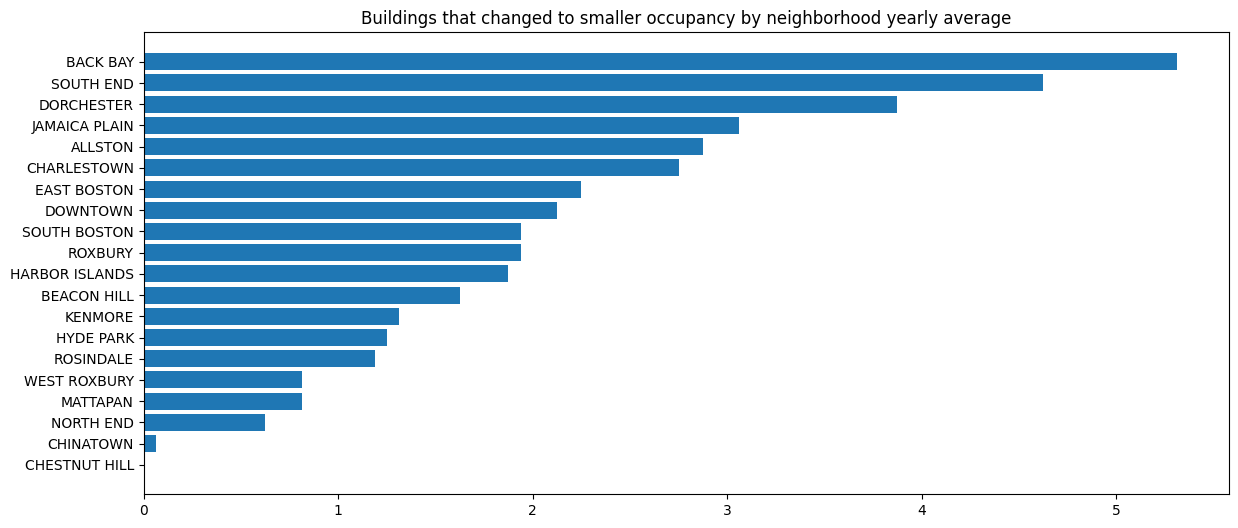

In [301]:
data5 = data2[data2["new_lu"].isna()==False].drop_duplicates("parcel_id")
data5 = data5[data5["city"].isna() == False]
data5[data5["new_lu"] == "CM"]["comments"].iloc[8]
x = data5["city"].unique()

h = []
A = data5.loc[(data5["init_lu"]=="A") & (data5["new_lu"].isin(["R4","R3","R2","R1"])) & (data5["city"] == c)]
R4 = data5.loc[(data5["init_lu"]=="R4") & (data5["new_lu"].isin(["R3","R2","R1"])) & (data5["city"] == c)]
R3 = data5.loc[(data5["init_lu"]=="R3") & (data5["new_lu"].isin(["R2","R1"])) & (data5["city"] == c)]
R2 = data5.loc[(data5["init_lu"]=="R2") & (data5["new_lu"].isin(["R1"])) & (data5["city"] == c)]
for c in x:
    A = data5.loc[(data5["init_lu"]=="A") & (data5["new_lu"].isin(["R4","R3","R2","R1"])) & (data5["city"] == c)]
    R4 = data5.loc[(data5["init_lu"]=="R4") & (data5["new_lu"].isin(["R3","R2","R1"])) & (data5["city"] == c)]
    R3 = data5.loc[(data5["init_lu"]=="R3") & (data5["new_lu"].isin(["R2","R1"])) & (data5["city"] == c)]
    R2 = data5.loc[(data5["init_lu"]=="R2") & (data5["new_lu"].isin(["R1"])) & (data5["city"] == c)]
    count = (len(A) + len(R4) + len(R3) + len(R2))/16
    h.append(count)
s = sorted(zip(h,x))
x = [a[1] for a in s]
h = [a[0] for a in s]
fig = plt.figure(figsize = (14,6))
plt.barh(x,h)
plt.title("Buildings that changed to smaller occupancy by neighborhood yearly average")
fig.savefig("all_permits_city_avg.png")
plt.show()


In [233]:
data3 = data2.drop_duplicates("parcel_id")
#data2[data2["new_lu"].isna() == False]["description"].unique()
data3.loc[(data3["init_lu"].isin(["R2","R3","R4","A"]) == True)]["description"].value_counts()
#data2[data2["new_lu"] == "R1"]["init_lu"].value_counts()

Electrical                            9090
Gas                                   3967
Interior/Exterior Work                2233
Roofing                               1890
Renovations - Exterior                1792
Solar Panels                          1141
Renovations - Interior NSC            1097
Insulation                            1002
Other                                  913
Low Voltage                            818
Change Occupancy                       751
No Record of Occupancy                 736
Plumbing                               546
Service Change                         507
Fire Alarm                             482
Siding                                 414
Addition                               357
Fire Protection/Sprinkler              146
Subdivision  Combining Lot             126
Erect                                  116
Application to Correct a Violation      92
Demolition - Interior                   54
Demolition - Exterior                   50
Fencing Ren

In [136]:
multi_data.to_csv("multi_unit_data.csv",index = False)

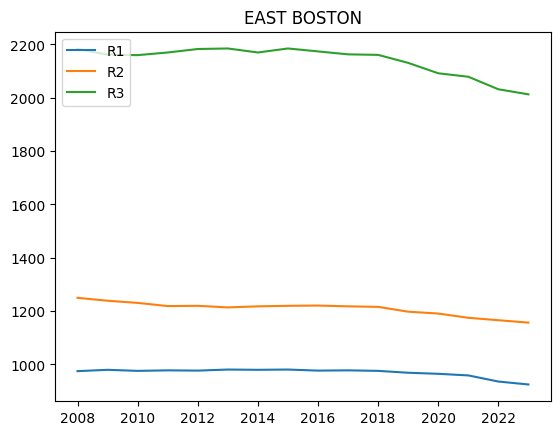

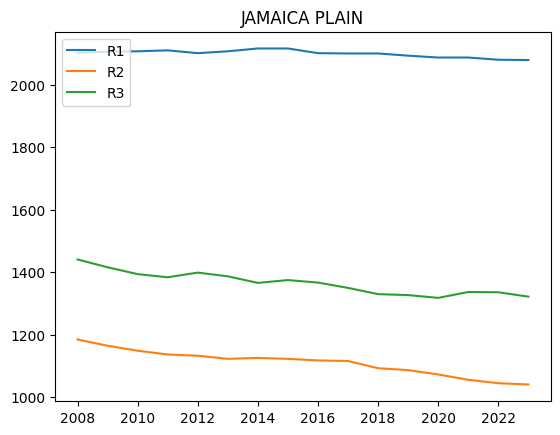

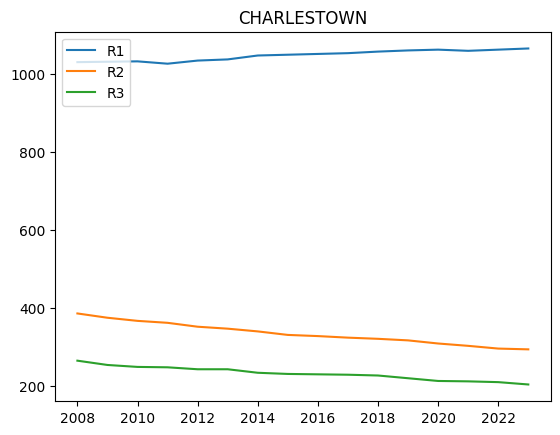

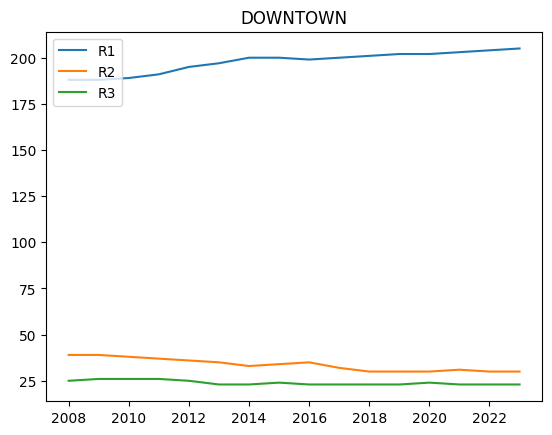

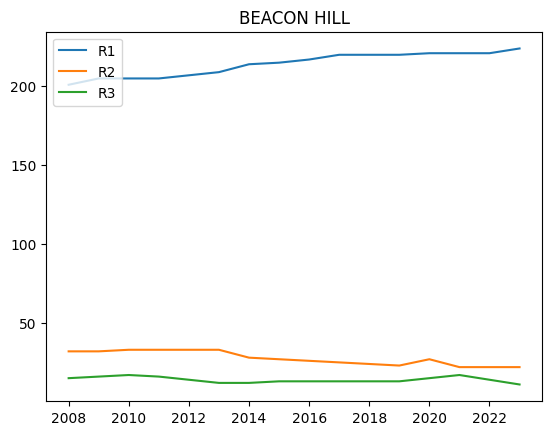

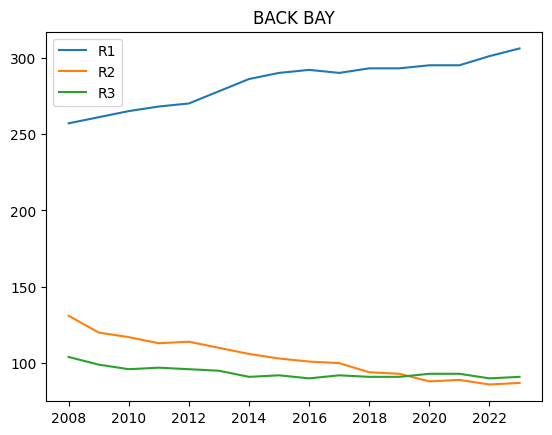

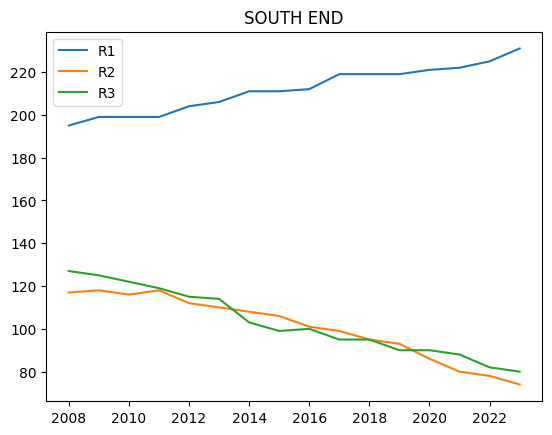

In [137]:
for city in ["EAST BOSTON","JAMAICA PLAIN","CHARLESTOWN","DOWNTOWN","BEACON HILL","BACK BAY","SOUTH END"]:
    df= multi_data[multi_data["city"] == city]
    plt.title(city)
    plt.plot("year","R1",data = df)
    plt.plot("year","R2",data = df)
    plt.plot("year","R3",data = df)
    plt.legend(loc='upper left')
    plt.show()

In [38]:
d1 = np.setdiff1d(assessments["ZIPCODE"].unique(),data["zip"].unique())
d2 = np.setdiff1d(data["zip"].unique(),assessments["ZIPCODE"].unique())
print(len(data))
print(len(assessments))
data = data[data["zip"].isin(d2) == False]
assessments = assessments[assessments["ZIPCODE"].isin(d1) == False]
print(len(data))
print(len(assessments))

597941
2775883
597941


In [155]:
assessments = assessments[assessments["ZIPCODE"].isin(["02199","02446"]) == False]

In [156]:
zipgroup = assessments.groupby("ZIPCODE")

In [157]:
a = zipgroup["Year"].value_counts()
counts = pd.DataFrame(columns = ["Year","Zip","Count","City"])
for i,year in enumerate(range(2010,2024)):
    for cat in assessments["ZIPCODE"].unique():
        counts.loc[len(counts)+1] = {"Year":year,"Zip":cat, "Count" : a[cat][year],"City" : zipdict[cat]}
       
    

In [158]:
counts

,Year,Zip,Count,City
1,2010,02128,7936,EAST BOSTON
2,2010,02115,4722,KENMORE
3,2010,02130,10671,JAMAICA PLAIN
4,2010,02129,6437,CHARLESTOWN
5,2010,02114,4460,DOWNTOWN
...,...,...,...,...
374,2023,02136,9208,HYDE PARK
375,2023,02135,11870,ALLSTON
376,2023,02132,10973,WEST ROXBURY
377,2023,02467,1017,CHESTNUT HILL


In [56]:
def sort_fun(x):
    r_val = [False,False]
    if x["description"] in ['Renovations - Exterior', 'Renovations - Interior NSC']:
        return [True,False]
    if x["description"] in ['Demolition - Exterior','Demolition - Interior']:
        return[False,True]
    return [False,False]
data[["Renovation","Demolition"]] = data.apply((lambda x: sort_fun(x)),axis=1,result_type="expand")

In [159]:
rens = data[data["Renovation"] == True]
rens_zipcounts = rens.groupby("zip")
rens_a = rens_zipcounts["Year"].value_counts()
rens_counts = pd.DataFrame(columns = ["Year","Zip","Count","City"])
for i,year in enumerate(range(2010,2024)):
    #rens_counts.at[i,"Year"] = year
    for cat in assessments["ZIPCODE"].unique():
        try:
            rens_counts.loc[len(rens_counts) + 1] = {"Year":year,"Zip":cat, "Count" : rens_a[cat][year],"City" : zipdict[cat]}
        except KeyError:
            rens_counts.loc[len(rens_counts) + 1]  = {"Year":year,"Zip":cat, "Count" : 0}

In [160]:
dems = data[data["Demolition"] == True]
dems_zipcounts = dems.groupby("zip")
dems_a = dems_zipcounts["Year"].value_counts()
dems_counts = pd.DataFrame(columns = ["Year","Zip","Count","City"])
for i,year in enumerate(range(2010,2024)):
    #rens_counts.at[i,"Year"] = year
    for cat in assessments["ZIPCODE"].unique():
        try:
            dems_counts.loc[len(dems_counts) + 1] = {"Year":year,"Zip":cat, "Count" : dems_a[cat][year],"City" : zipdict[cat]}
        except KeyError:
            dems_counts.loc[len(dems_counts) + 1]  = {"Year":year,"Zip":cat, "Count" : 0}

In [161]:
rens_counts_stan = rens_counts
dems_counts_stan = dems_counts
dems_counts_stan["Count"] = dems_counts_stan["Count"]/counts["Count"] * 1000
rens_counts_stan["Count"] = rens_counts_stan["Count"]/counts["Count"] * 1000

In [162]:
dems_counts_stan

,Year,Zip,Count,City
1,2010,02128,3.654234,EAST BOSTON
2,2010,02115,11.435832,KENMORE
3,2010,02130,2.155374,JAMAICA PLAIN
4,2010,02129,2.951686,CHARLESTOWN
5,2010,02114,2.914798,DOWNTOWN
...,...,...,...,...
374,2023,02136,1.194613,HYDE PARK
375,2023,02135,0.758214,ALLSTON
376,2023,02132,1.366992,WEST ROXBURY
377,2023,02467,0.000000,NaN


In [163]:
rens_counts_stan["Zip"].unique()

array(['02128', '02115', '02130', '02129', '02114', '02113', '02109',
       '02108', '02110', '02210', '02116', '02111', '02127', '02118',
       '02215', '02120', '02125', '02122', '02124', '02131', '02121',
       '02126', '02136', '02135', '02132', '02467', '02134'], dtype=object)

In [164]:
rens_counts_stan["Zip"] = rens_counts_stan.apply((lambda x : "Zip_" + x["Zip"]),axis = 1)
dems_counts_stan["Zip"] = dems_counts_stan.apply((lambda x : "Zip_" + x["Zip"]),axis = 1)
rens_counts_stan.to_csv("renovations.csv",index = False)
dems_counts_stan.to_csv("demolitions.csv",index = False)